一个用神经网络实现线性回归的例子
==

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

 ### 在构建网络的时候一直在想到底是w*x 还是 x*w，所以做了实验 ：
  x*W+b
 ===

(200, 1) (200, 1)


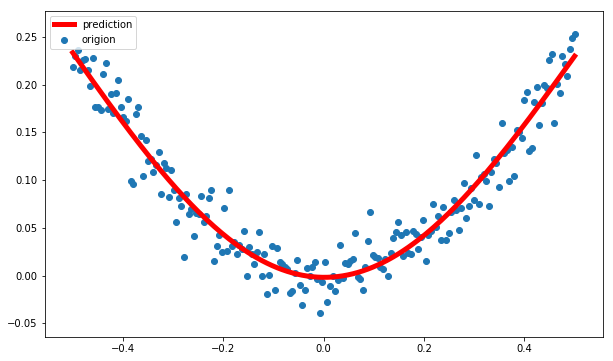

In [57]:
#生成数据
x_data = np.linspace(-0.5,0.5,200).reshape((-1,1))
noise  = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#构建一个神经网络   1个输入神经元 ，10个中间神经元，1个输出神经元
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1  = tf.Variable(tf.zeros((1,10)))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1)+biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2  = tf.Variable(tf.zeros((1,1)))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2)+biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(5000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    print(x_data.shape,prediction_value.shape)
    plt.figure(figsize=(10,6))
    plt.scatter(x_data,y_data,label='origion')
    plt.plot(x_data,prediction_value,'r-',lw=5,label = 'prediction')
    plt.legend()
    plt.show()

W*x + b
==

(1, 200) (1, 200)


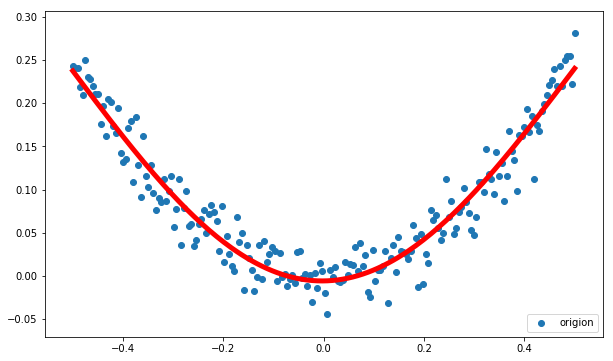

In [58]:
#生成数据
x_data = np.linspace(-0.5,0.5,200).reshape((1,-1))
noise  = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[1,None])
y = tf.placeholder(tf.float32,[1,None])

#构建一个神经网络   1个输入神经元 ，10个中间神经元，1个输出神经元
Weights_L1 = tf.Variable(tf.random_normal([10,1]))
biases_L1  = tf.Variable(tf.zeros((10,1)))
Wx_plus_b_L1 = tf.matmul(Weights_L1,x)+biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([1,10]))
biases_L2  = tf.Variable(tf.zeros((1,1)))
Wx_plus_b_L2 = tf.matmul(Weights_L2,L1)+biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction),1)

#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
#         if i%500 ==0:
#             print(sess.run(loss,feed_dict={x:x_data,y:y_data}))
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    print(x_data.shape,prediction_value.shape)

    plt.figure(figsize=(10,6))
    plt.scatter(x_data,y_data,label='origion')
    plt.plot(x_data.reshape((-1,1)),prediction_value.reshape((-1,1)),'r-',lw=5) #x需要对矩阵进行reshape操作
    
    
    plt.legend(loc='lower right')
    plt.show()

## 这里遇到一个问题需要注意：对（x,y）画图时，如果x.shape = y.shape = (1,n),则plt.plot()就画不出来，必须要转为x.shape=y.shape=(n,1)

(1, 3) (3, 1)


Text(0.5,1,'n-row,1-column')

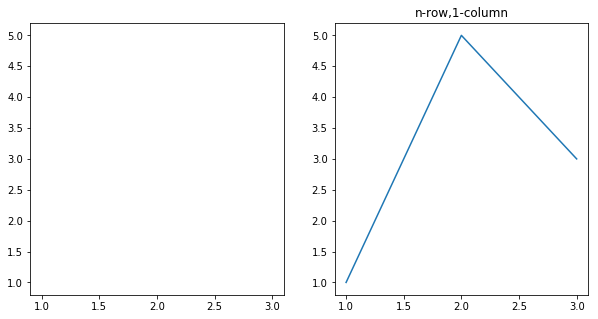

In [59]:
m = np.array([[1,5,3]])
n = np.array([[1,2,3]])
print(n.shape,n.reshape((-1,1)).shape)
fig,ax =plt.subplots(1,2,figsize=(10,5))
ax[0].plot(n,m)
plt.title('1-row,n-column')
ax[1].plot(n.reshape((-1,1)),m.reshape([-1,1]))
plt.title('n-row,1-column')